In [1]:
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def generarDatosImc(n):
    datos = []
    for i in range(n):
        estatura = round(random.uniform(0.50, 2.00), 2)
        imc = round(random.uniform(18.5, 24.9), 2)
        peso = round(imc * (estatura ** 2), 2)

        imcCalculado = peso / (estatura ** 2)
        if imcCalculado < 18.5:
            peso = round(18.5 * (estatura ** 2), 2)
        elif imcCalculado > 24.9:
            peso = round(24.9 * (estatura ** 2), 2)

        datos.append((estatura, peso))
    return datos

datos = generarDatosImc(100)

In [4]:
print("Datos generados")
for estatura, peso in datos:
    print("Estatura: {} m, Peso: {} kg".format(estatura, peso))


estatura = [dato[0] for dato in datos]
peso = [dato[1] for dato in datos]

def ajusteLineal(x, a, b):
    return a * x + b

Datos generados
Estatura: 1.4 m, Peso: 40.71 kg
Estatura: 1.09 m, Peso: 29.45 kg
Estatura: 1.01 m, Peso: 23.78 kg
Estatura: 0.66 m, Peso: 8.46 kg
Estatura: 0.97 m, Peso: 23.12 kg
Estatura: 0.58 m, Peso: 7.21 kg
Estatura: 1.61 m, Peso: 53.03 kg
Estatura: 1.68 m, Peso: 70.19 kg
Estatura: 0.76 m, Peso: 12.16 kg
Estatura: 1.28 m, Peso: 30.34 kg
Estatura: 1.98 m, Peso: 77.58 kg
Estatura: 0.54 m, Peso: 6.57 kg
Estatura: 1.07 m, Peso: 28.37 kg
Estatura: 1.21 m, Peso: 30.57 kg
Estatura: 1.38 m, Peso: 41.76 kg
Estatura: 1.05 m, Peso: 23.58 kg
Estatura: 0.75 m, Peso: 12.05 kg
Estatura: 1.38 m, Peso: 35.33 kg
Estatura: 1.91 m, Peso: 80.04 kg
Estatura: 1.45 m, Peso: 45.96 kg
Estatura: 0.83 m, Peso: 14.76 kg
Estatura: 1.6 m, Peso: 53.99 kg
Estatura: 1.39 m, Peso: 39.82 kg
Estatura: 0.97 m, Peso: 17.51 kg
Estatura: 0.86 m, Peso: 17.57 kg
Estatura: 1.82 m, Peso: 77.21 kg
Estatura: 1.12 m, Peso: 31.02 kg
Estatura: 1.54 m, Peso: 51.94 kg
Estatura: 1.18 m, Peso: 31.65 kg
Estatura: 0.51 m, Peso: 6.04 kg


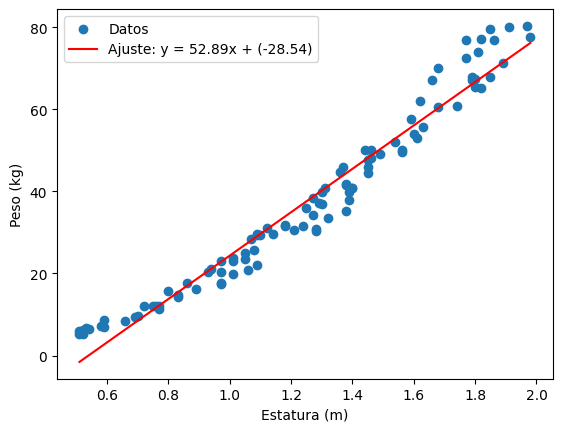

In [5]:
rangoMinimoX = min(estatura)
rangoMaximoX = max(estatura)

generadorPuntosX = [rangoMinimoX + i * (rangoMaximoX - rangoMinimoX) / 99 for i in range(100)]

parametros = curve_fit(ajusteLineal, estatura, peso)[0]
a = parametros[0]
b = parametros[1]

calculoY = [ajusteLineal(x, a, b) for x in generadorPuntosX]

plt.scatter(estatura, peso, label="Datos")
plt.plot(generadorPuntosX, calculoY, color="red", label="Ajuste: y = {:.2f}x + ({:.2f})".format(a, b))
plt.xlabel("Estatura (m)")
plt.ylabel("Peso (kg)")
plt.legend()
plt.show()